### Data Understanding

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

print("All packages installed successfully!")


All packages installed successfully!


Load Dataset

In [3]:

# Load the dataset
df = pd.read_csv("Food_Production.csv")

# Display basic info
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [4]:
# Show the first few rows
df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


Check for Missing Values

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]  # Show only columns with missing values


Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   10
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      16
Freshwater withdrawals per 1000kcal (liters per 1000kcal)                  13
Freshwater withdrawals per 100g protein (liters per 100g protein)          17
Freshwater withdrawals per kilogram (liters per kilogram)                   5
Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)               10
Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)       16
Land use per 1000kcal (m² per 1000kcal)                                    10
Land use per kilogram (m² per kilogram)                                     5
Land use per 100g protein (m² per 100g protein)                            16
Scarcity-weighted water use per kilogram (liters per kilogram)              5
Scarcity-weighted water use per 100g protein (liters per 100g pr

Summary Statistics

In [6]:
# Get summary statistics
df.describe()


,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,33.000000,38.000000,...,26.000000,38.000000,33.000000,27.000000,33.000000,38.000000,27.000000,38.000000,26.000000,30.000000
mean,1.260465,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,27.181547,46.141316,...,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
std,3.357730,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,46.445959,82.808808,...,1441.981970,1296.999186,10.613575,19.427462,28.348693,78.490074,49.307339,56891.283046,89928.189299,16232.080209
min,-2.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,...,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.214932,3.752500,...,373.573281,105.500000,0.628415,4.027439,1.312500,1.112500,5.088235,3325.075000,11018.401008,2969.124983
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,7.000000,11.460000,...,1083.327273,417.100000,1.351351,6.500000,2.976244,6.865000,7.936314,14533.050000,20917.213595,12605.256790
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,26.324324,45.840000,...,1832.386339,1340.375000,5.335135,14.983333,6.605405,14.917500,23.002381,35960.175000,70651.721023,28056.471593
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,197.357143,365.290000,...,6003.333333,5605.200000,50.946429,93.300000,119.490842,369.810000,184.812594,229889.800000,431620.000000,49735.882350


Check Correlations

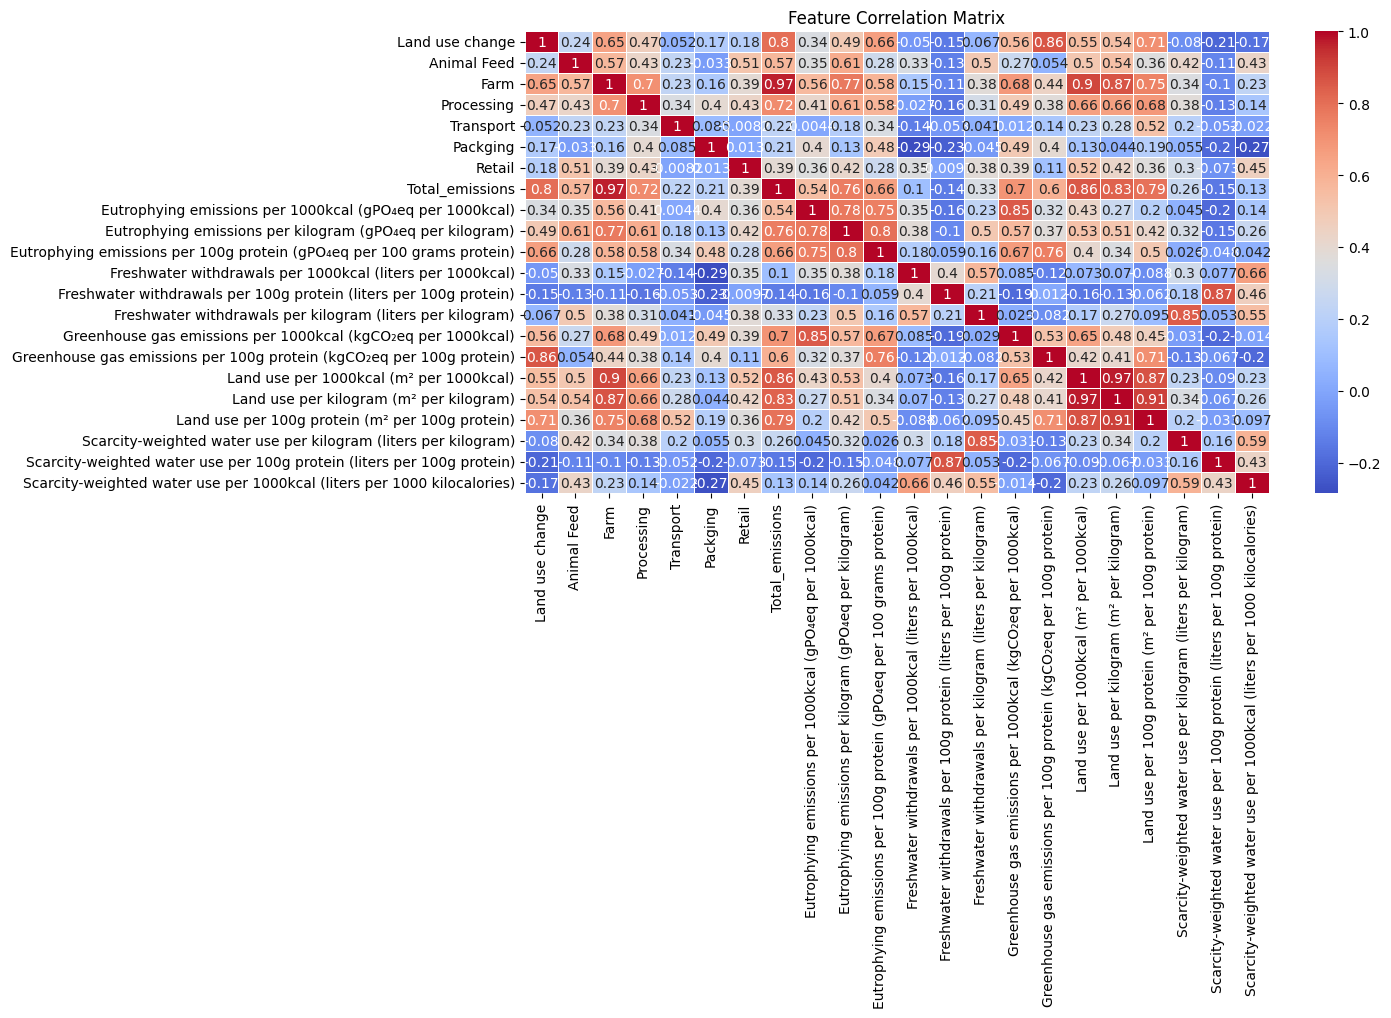

In [7]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


Visualize Key Features

1. Carbon Emissions Across Food Types 

In [8]:
fig = px.bar(df, x="Food product", y="Farm", title="Carbon Emissions at the Farm Level")
fig.show()


2. Land Use vs. Carbon Emissions

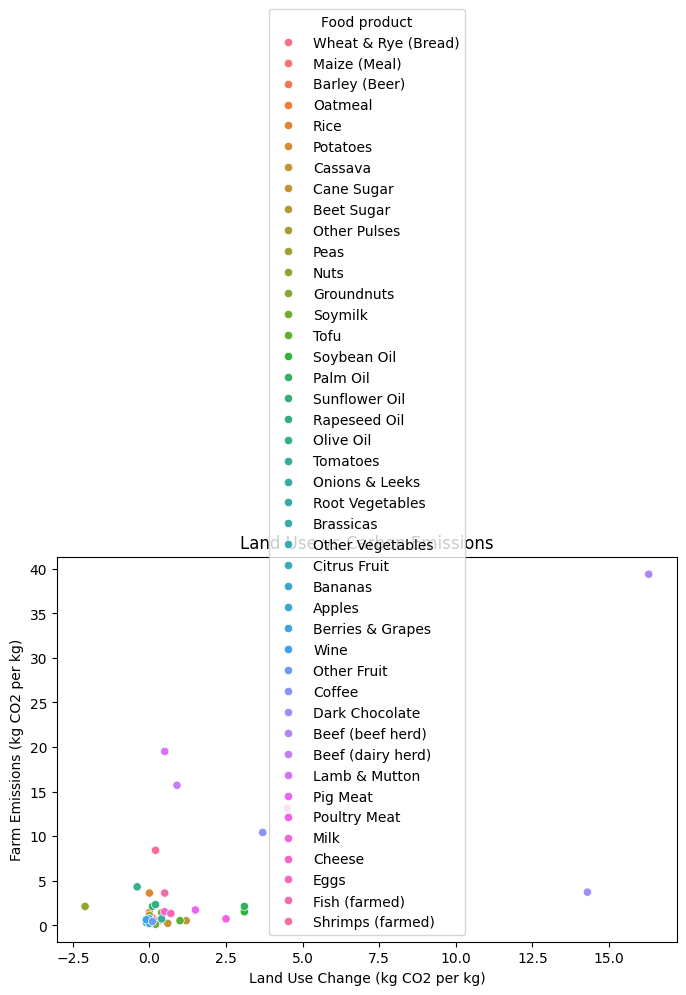

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Land use change", y="Farm", hue="Food product")
plt.title("Land Use vs Carbon Emissions")
plt.xlabel("Land Use Change (kg CO2 per kg)")
plt.ylabel("Farm Emissions (kg CO2 per kg)")
plt.show()


EDA

Uni

Distribution of Carbon Emissions by Food Product

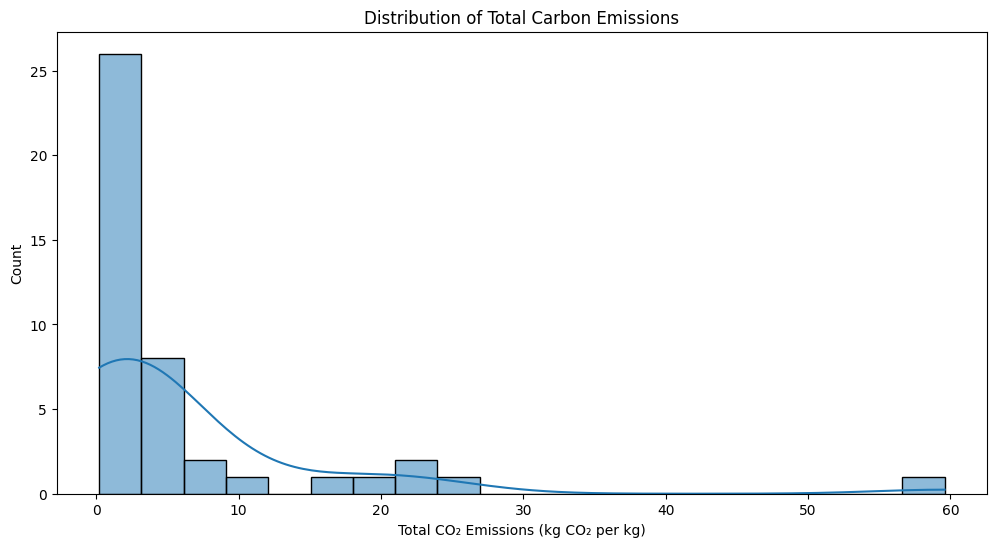

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(df["Total_emissions"], bins=20, kde=True)
plt.title("Distribution of Total Carbon Emissions")
plt.xlabel("Total CO₂ Emissions (kg CO₂ per kg)")
plt.ylabel("Count")
plt.show()


Highest Emissions by Food

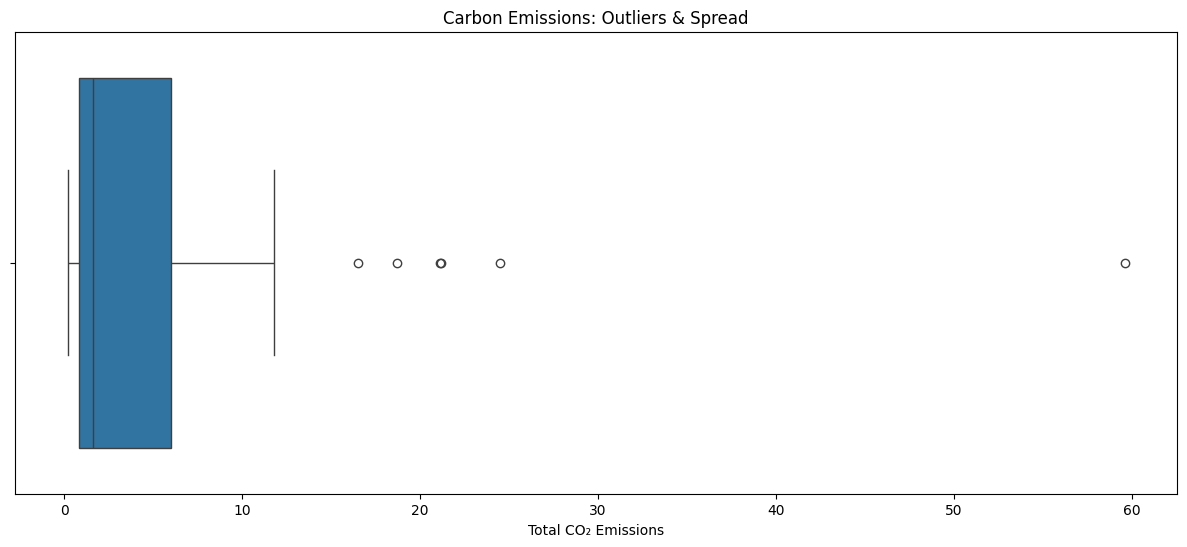

In [11]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=df["Total_emissions"])
plt.title("Carbon Emissions: Outliers & Spread")
plt.xlabel("Total CO₂ Emissions")
plt.show()


Biv

Land Use vs. Carbon Emissions

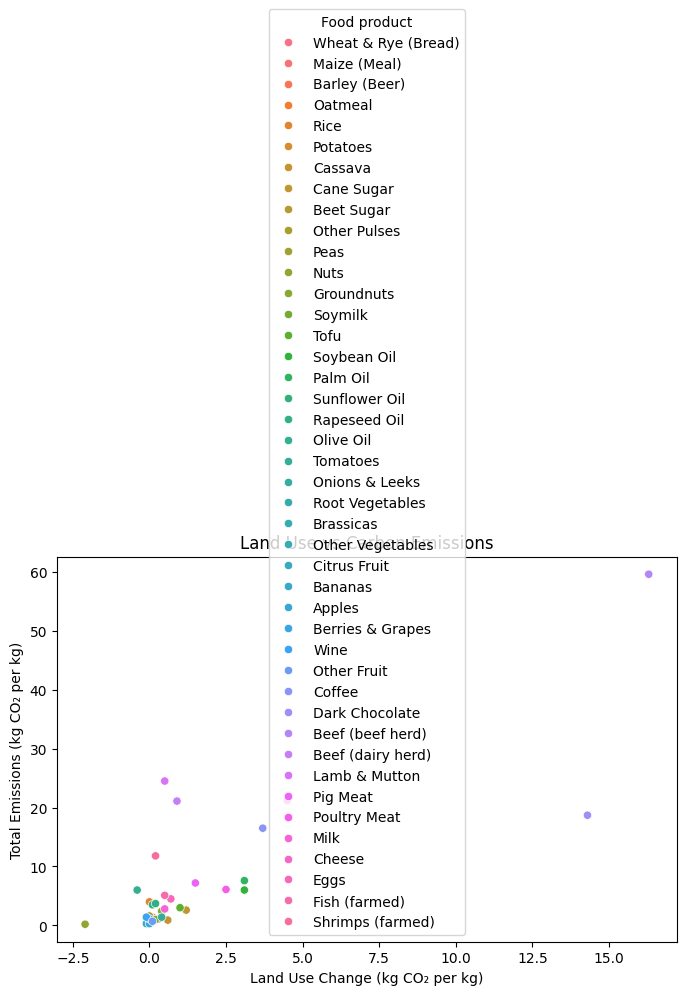

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Land use change", y="Total_emissions", hue="Food product")
plt.title("Land Use vs Carbon Emissions")
plt.xlabel("Land Use Change (kg CO₂ per kg)")
plt.ylabel("Total Emissions (kg CO₂ per kg)")
plt.show()


Multi

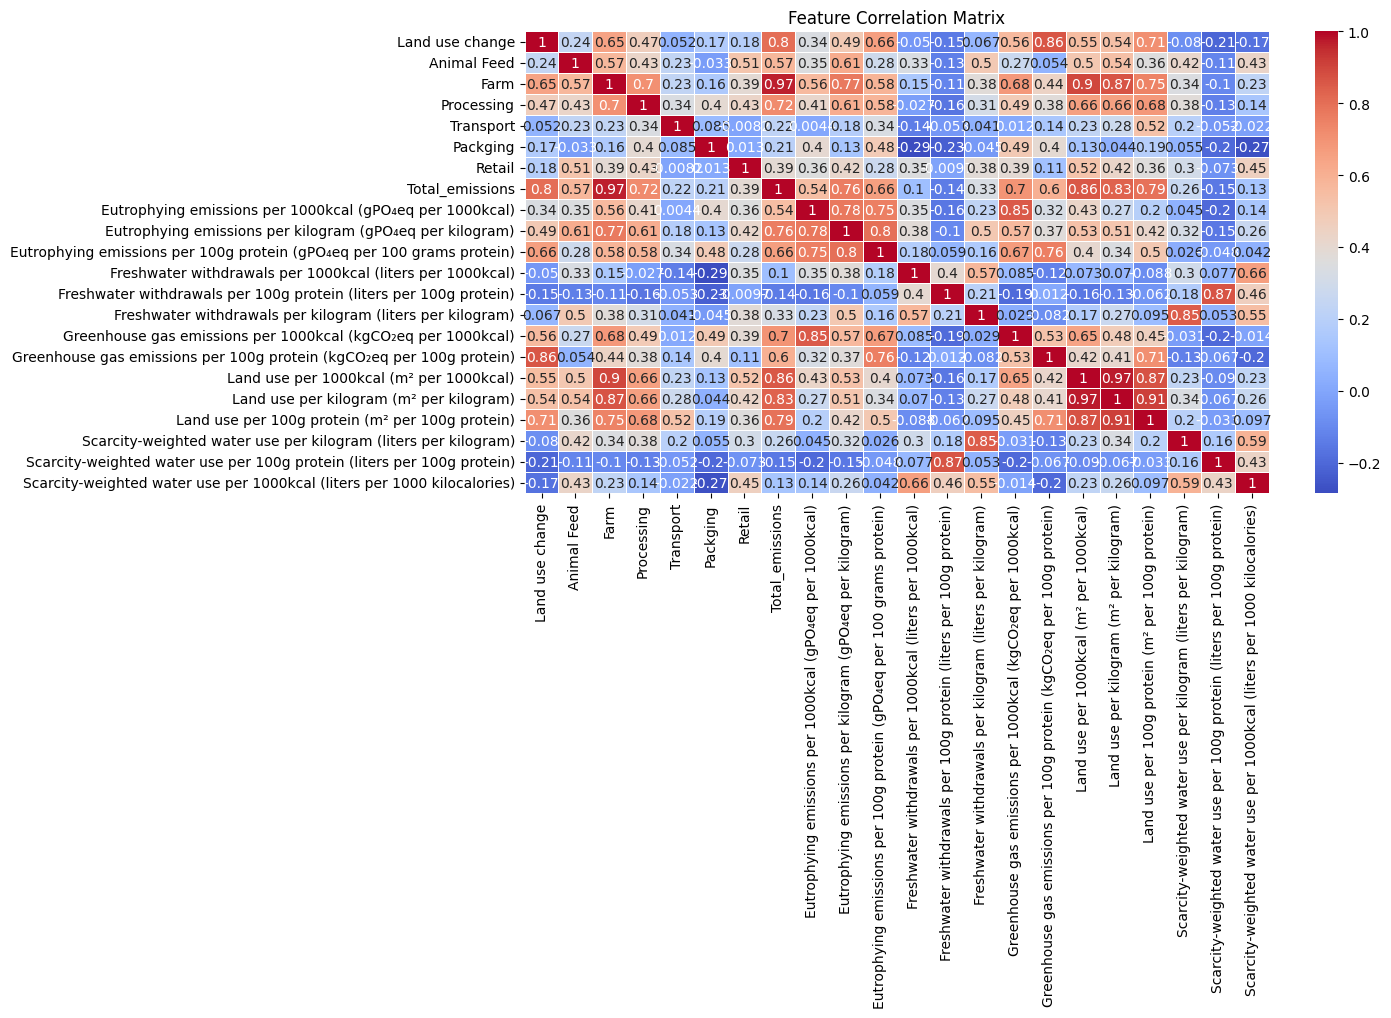

In [13]:
# Select numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


### Data Preparation

Clean Data

In [14]:
# Checking for missing values
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage[missing_percentage > 0])


Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   23.255814
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   11.627907
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      37.209302
Freshwater withdrawals per 1000kcal (liters per 1000kcal)                  30.232558
Freshwater withdrawals per 100g protein (liters per 100g protein)          39.534884
Freshwater withdrawals per kilogram (liters per kilogram)                  11.627907
Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)               23.255814
Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)       37.209302
Land use per 1000kcal (m² per 1000kcal)                                    23.255814
Land use per kilogram (m² per kilogram)                                    11.627907
Land use per 100g protein (m² per 100g protein)                            37.209302
Scarcity-weighted water use per kilogram (liters per kilogram)   

In [15]:
# Fill missing values with the mean of each column except the "Food product" column which is categorical 
df.fillna(df.select_dtypes(include=['float64']).mean(), inplace=True)

# Display the updated dataframe
print(df.info())  # To confirm no more missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [16]:
# confirm changes made
df.isnull().sum()

Food product                                                               0
Land use change                                                            0
Animal Feed                                                                0
Farm                                                                       0
Processing                                                                 0
Transport                                                                  0
Packging                                                                   0
Retail                                                                     0
Total_emissions                                                            0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   0
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   0
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      0
Freshwater withdrawals per 1000kcal (liters per 1000kcal)                  0

Data Quality

In [17]:
# Fix Column Name Typo ("Packging" → "Packaging")
df.rename(columns={"Packging": "Packaging"}, inplace=True)

In [18]:
# Ensure "Food product" is Properly Formatted
df["Food product"] = df["Food product"].str.strip()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packaging                                                                43 

In [20]:
df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packaging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,27.181547,...,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,27.181547,...,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,27.181547,...,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.400000,0.945482,1.907692,2.897446,7.600000,5.846154,18786.200000,14450.923080,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.400000,1.207271,6.267606,0.759631,2.800000,3.943662,49576.300000,69825.774650,13449.891480


In [21]:
# Display all 43 rows
pd.set_option('display.max_rows', 43)
print(df)


           Food product  Land use change  Animal Feed  Farm  Processing  \
0   Wheat & Rye (Bread)              0.1          0.0   0.8         0.2   
1          Maize (Meal)              0.3          0.0   0.5         0.1   
2         Barley (Beer)              0.0          0.0   0.2         0.1   
3               Oatmeal              0.0          0.0   1.4         0.0   
4                  Rice              0.0          0.0   3.6         0.1   
5              Potatoes              0.0          0.0   0.2         0.0   
6               Cassava              0.6          0.0   0.2         0.0   
7            Cane Sugar              1.2          0.0   0.5         0.0   
8            Beet Sugar              0.0          0.0   0.5         0.2   
9          Other Pulses              0.0          0.0   1.1         0.0   
10                 Peas              0.0          0.0   0.7         0.0   
11                 Nuts             -2.1          0.0   2.1         0.0   
12           Groundnuts  

**Feature Engineering**

Create some useful new columns make analysis easier

'Food Category' column (Plant vs Animal)

In [22]:

# Display unique food products
food_products = df["Food product"].unique()
food_products


array(['Wheat & Rye (Bread)', 'Maize (Meal)', 'Barley (Beer)', 'Oatmeal',
       'Rice', 'Potatoes', 'Cassava', 'Cane Sugar', 'Beet Sugar',
       'Other Pulses', 'Peas', 'Nuts', 'Groundnuts', 'Soymilk', 'Tofu',
       'Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil',
       'Olive Oil', 'Tomatoes', 'Onions & Leeks', 'Root Vegetables',
       'Brassicas', 'Other Vegetables', 'Citrus Fruit', 'Bananas',
       'Apples', 'Berries & Grapes', 'Wine', 'Other Fruit', 'Coffee',
       'Dark Chocolate', 'Beef (beef herd)', 'Beef (dairy herd)',
       'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Milk', 'Cheese',
       'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'], dtype=object)

In [23]:
# Define plant-based and animal-based food lists
plant_based = [
    "Wheat & Rye (Bread)", "Maize (Meal)", "Barley (Beer)", "Oatmeal", "Rice", "Potatoes", "Cassava",
    "Cane Sugar", "Beet Sugar", "Soybean Oil", "Palm Oil", "Sunflower Oil", "Rapeseed Oil", "Olive Oil",
    "Other Pulses", "Peas", "Nuts", "Groundnuts", "Soymilk", "Tofu",
    "Tomatoes", "Onions & Leeks", "Root Vegetables", "Brassicas", "Other Vegetables",
    "Citrus Fruit", "Bananas", "Apples", "Berries & Grapes", "Other Fruit",
    "Wine", "Coffee", "Dark Chocolate"
]

animal_based = [
    "Beef (beef herd)", "Beef (dairy herd)", "Lamb & Mutton", "Pig Meat", "Poultry Meat",
    "Milk", "Cheese", "Eggs",
    "Fish (farmed)", "Shrimps (farmed)"
]

# Assign category to a new column
df["Category"] = df["Food product"].apply(lambda x: "Plant-Based" if x in plant_based else "Animal-Based")

# Check the result
df[["Food product", "Category"]].head(10)


,Food product,Category
0,Wheat & Rye (Bread),Plant-Based
1,Maize (Meal),Plant-Based
2,Barley (Beer),Plant-Based
3,Oatmeal,Plant-Based
4,Rice,Plant-Based
5,Potatoes,Plant-Based
6,Cassava,Plant-Based
7,Cane Sugar,Plant-Based
8,Beet Sugar,Plant-Based
9,Other Pulses,Plant-Based


Total Water Use and Total Land Use

In [24]:
#  need all columns that measure water consumption.

water_columns = [col for col in df.columns if "water" in col.lower() or "withdrawals" in col.lower()]
print(water_columns)


['Freshwater withdrawals per 1000kcal (liters per 1000kcal)', 'Freshwater withdrawals per 100g protein (liters per 100g protein)', 'Freshwater withdrawals per kilogram (liters per kilogram)', 'Scarcity-weighted water use per kilogram (liters per kilogram)', 'Scarcity-weighted water use per 100g protein (liters per 100g protein)', 'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)']


In [25]:
# also need all columns that measure land footprint

land_columns = [col for col in df.columns if "land use" in col.lower()]
print(land_columns)


['Land use change', 'Land use per 1000kcal (m² per 1000kcal)', 'Land use per kilogram (m² per kilogram)', 'Land use per 100g protein (m² per 100g protein)']


Now create the Total Water Use and Total Land Use

In [26]:
df["Total Water Use"] = df[
    [
        "Freshwater withdrawals per 1000kcal (liters per 1000kcal)",
        "Freshwater withdrawals per 100g protein (liters per 100g protein)",
        "Freshwater withdrawals per kilogram (liters per kilogram)",
        "Scarcity-weighted water use per kilogram (liters per kilogram)",
        "Scarcity-weighted water use per 100g protein (liters per 100g protein)",
        "Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)"
    ]
].sum(axis=1)


In [27]:
df["Total Land Use"] = df[
    [
        "Land use change",
        "Land use per 1000kcal (m² per 1000kcal)",
        "Land use per kilogram (m² per kilogram)",
        "Land use per 100g protein (m² per 100g protein)"
    ]
].sum(axis=1)


In [28]:
# confirm changes made

df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packaging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Category,Total Water Use,Total Land Use
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,27.181547,...,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408,Plant-Based,116059.212423,70.892681
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,27.181547,...,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408,Plant-Based,116059.212423,71.092681
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,27.181547,...,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408,Plant-Based,116059.212423,70.792681
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,1.907692,2.897446,7.600000,5.846154,18786.200000,14450.923080,7162.104461,Plant-Based,41436.616016,16.343600
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,6.267606,0.759631,2.800000,3.943662,49576.300000,69825.774650,13449.891480,Plant-Based,138877.110415,7.503293


**Standardization & Scaling**

In [29]:

scaler = StandardScaler()
df[["Total_emissions", "Total Water Use", "Total Land Use"]] = scaler.fit_transform(
    df[["Total_emissions", "Total Water Use", "Total Land Use"]]
)


In [30]:
df[["Total_emissions", "Total Water Use", "Total Land Use"]].describe()


,Total_emissions,Total Water Use,Total Land Use
count,4.300000e+01,4.300000e+01,4.300000e+01
mean,1.420053e-16,9.940369e-17,8.028139e-18
std,1.011835e+00,1.011835e+00,1.011835e+00
min,-5.561361e-01,-1.116789e+00,-5.051233e-01
25%,-4.935092e-01,-5.479470e-01,-4.072918e-01
50%,-4.212473e-01,-2.714473e-01,-2.775888e-01
75%,2.688813e-03,1.177144e-03,-5.723833e-02
max,5.167002e+00,3.528324e+00,4.480713e+00


**Hypothesis Testing**

1. Hypothesis Testing for Total Emissions

Null Hypothesis (H₀): There is no significant difference in environmental impact(Total Emissions)  between plant-based and animal-based foods.

Alternative Hypothesis (H₁): Animal-based foods have a significantly higher environmental impact(Total Emissions)  than plant-based foods.

Assumption Check


Normality Check (Shapiro-Wilk Test): Ensures that Total_emissions follows a normal distribution for both Plant-Based and Animal-Based foods.

Variance Check (Levene’s Test): Ensures that the two groups have similar variance.

In [31]:
from scipy.stats import shapiro, levene

# Separate the groups
plant_emissions = df[df["Category"] == "Plant-Based"]["Total_emissions"]
animal_emissions = df[df["Category"] == "Animal-Based"]["Total_emissions"]

# 1️⃣ Normality Test (Shapiro-Wilk Test)
shapiro_plant = shapiro(plant_emissions)
shapiro_animal = shapiro(animal_emissions)

print(f"Shapiro Test for Plant-Based: p-value = {shapiro_plant.pvalue:.4f}")
print(f"Shapiro Test for Animal-Based: p-value = {shapiro_animal.pvalue:.4f}")

# 2️⃣ Variance Test (Levene’s Test)
levene_test = levene(plant_emissions, animal_emissions)
print(f"Levene’s Test for Equal Variance: p-value = {levene_test.pvalue:.4f}")


Shapiro Test for Plant-Based: p-value = 0.0000
Shapiro Test for Animal-Based: p-value = 0.0040
Levene’s Test for Equal Variance: p-value = 0.0018


**📊 Interpretation of Results**

1️⃣ Shapiro-Wilk Normality Test

Plant-Based (p-value = 0.0000) → 🚨 Not Normal

Animal-Based (p-value = 0.0040) → 🚨 Not Normal
🔹 Since both distributions are NOT normal (p < 0.05), we cannot use the t-test.


2️⃣ Levene’s Test for Equal Variance

p-value = 0.0018 → 🚨 Variances are NOT equal
🔹 This means if we were using a t-test, we would have needed Welch’s t-test, but since normality doesn’t hold, we won’t use it.

**🚀 Best Test to Use:** Mann-Whitney U Test

Since the data is not normally distributed, we will use the Mann-Whitney U test, which is a non-parametric alternative to the t-test.

**Perform Mann-Whitney U Test**

In [33]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test (alternative="greater" since we assume animal-based emissions > plant-based)
u_stat, p_value = mannwhitneyu(plant_emissions, animal_emissions, alternative="greater")

print(f"Mann-Whitney U Test Results: U-statistic = {u_stat:.4f}, p-value = {p_value:.4f}")


Mann-Whitney U Test Results: U-statistic = 27.0000, p-value = 1.0000


📊 Interpretation of Mann-Whitney U Test Results
U-statistic = 27.0000 (Not directly meaningful but used to compute p-value)

p-value = 1.0000 🚨

❌ Decision: Fail to Reject H₀
Since p-value > 0.05, we fail to reject the null hypothesis. This means:

✅ There is no significant difference in environmental impact (Total Emissions) between plant-based and animal-based foods.

This could mean that some plant-based foods (like; nuts, oils, other fruits) contribute heavily to emissions, balancing out the difference.

In [ ]:
# Compare median emissions of both groups

print(df.groupby("Category")["Total_emissions"].median())


Category
Animal-Based    0.339911
Plant-Based    -0.440517
Name: Total_emissions, dtype: float64


📊 Interpretation of Median Emissions

Animal-Based Median Emissions: 0.3399

Plant-Based Median Emissions: -0.4405

Even though animal-based foods have a higher median emission, the hypothesis test showed no statistically significant difference because of high variability in emissions across plant-based foods.

This suggests:

✅ Some plant-based foods (e.g., nuts, oils, chocolate, wine) have high emissions, balancing the difference.

✅ The distribution of emissions is wide, making it hard to detect a clear statistical difference.



2. Hypothesis Testing for Water Use

Null Hypothesis (H₀): There is no significant difference in Water Use between plant-based and animal-based foods.

Alternative Hypothesis (H₁): Animal-based foods have a significantly higher Water Use than plant-based foods.

In [35]:
from scipy.stats import mannwhitneyu

# Test if animal-based foods use significantly more water than plant-based
u_stat, p_value = mannwhitneyu(df[df["Category"] == "Plant-Based"]["Total Water Use"],
                               df[df["Category"] == "Animal-Based"]["Total Water Use"],
                               alternative="greater")

print(f"Mann-Whitney U Test (Water Use): U-statistic = {u_stat:.4f}, p-value = {p_value:.4f}")


Mann-Whitney U Test (Water Use): U-statistic = 117.0000, p-value = 0.9185
